# Weibull distribution probability plot and Mann-Whitney U test
Reference: <br>
https://reliability.readthedocs.io/en/latest/Probability%20plots.html <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from scipy import stats
from scipy.stats import mannwhitneyu

from reliability.Probability_plotting import Weibull_probability_plot
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P

%matplotlib inline

In [3]:
# Make test samples
dist_1 = Weibull_Distribution(alpha=500, beta=10.5)
dist_2 = Weibull_Distribution(alpha=550, beta=11.0)
dist_3 = Weibull_Distribution(alpha=800, beta=4.5)
dist_4 = Weibull_Distribution(alpha=750, beta=5.0)

dist_1_data = dist_1.random_samples(15)
dist_2_data = dist_2.random_samples(20)
dist_3_data = dist_3.random_samples(12)
dist_4_data = dist_4.random_samples(18)

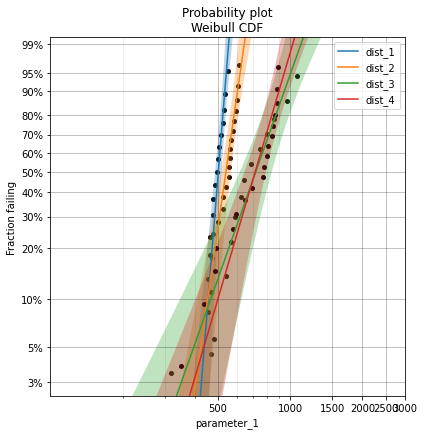

In [4]:
# Draw Weibull probability plot
Weibull_probability_plot(failures = dist_1_data, label = 'dist_1')
Weibull_probability_plot(failures = dist_2_data, label = 'dist_2')
Weibull_probability_plot(failures = dist_3_data, label = 'dist_3')
Weibull_probability_plot(failures = dist_4_data, label = 'dist_4')

plt.gcf().set_size_inches(6, 6)
plt.xlabel('parameter_1')
plt.xlim(100.0, 3000.0)
plt.legend(loc = 'best')

plt.show()

In [5]:
# Show Weibull parameters and percentiles
Fit_Weibull_2P(failures = dist_1_data, percentiles = True, CI = 0.8, show_probability_plot = False)
Fit_Weibull_2P(failures = dist_2_data, percentiles = [20, 50, 80], CI = 0.8, show_probability_plot = False)
#Fit_Weibull_2P(failures = dist_3_data, percentiles = True, CI = 0.8, show_probability_plot = False)
#Fit_Weibull_2P(failures = dist_4_data, percentiles = True, CI = 0.8, show_probability_plot = False)

plt.close()

Results from Fit_Weibull_2P (80% CI):
           Point Estimate  Standard Error    Lower CI    Upper CI
Parameter                                                        
Alpha          511.421638        7.290719  502.163038  520.850942
Beta            19.241626        3.675930   15.063095   24.579290
Log-Likelihood: -71.5287364276795 

Table of percentiles (80% CI bounds on time):
            Lower Estimate  Point Estimate  Upper Estimate
Percentile                                                
1               376.596903      402.671699      430.551860
5               418.060858      438.268339      459.452573
10              437.651474      454.974467      472.983133
20              458.834283      473.069117      487.745572
25              466.148472      479.356301      492.938360
50              491.677379      501.772312      512.074509
75              511.248429      520.177329      529.262171
80              515.289674      524.227856      533.321079
90              524.674350

### Mann-Whitney U test (= Wilcoxon rank-sum test)

In [6]:
# Convert numpy array to dictionary for test
keys = ['dist_1_data', 'dist_2_data', 'dist_3_data', 'dist_4_data']
values = [dist_1_data, dist_2_data, dist_3_data, dist_4_data]

data_dict = {k: v for k, v in zip(keys, values)}
data_dict

{'dist_1_data': array([504.43642829, 514.36830605, 523.08235389, 472.00898847,
        497.69849941, 467.52687069, 476.46773082, 476.1225947 ,
        529.70516653, 476.73088334, 533.05631439, 501.70632091,
        552.33179704, 485.4502671 , 468.00004316]),
 'dist_2_data': array([557.5761577 , 522.49756388, 583.15410837, 455.21989815,
        594.9995711 , 579.00624861, 603.8087927 , 560.03166668,
        538.12976848, 318.57696257, 463.83685554, 602.20963355,
        524.64538065, 455.68955651, 566.60424167, 464.23588954,
        556.72265878, 612.70741383, 501.15385636, 561.94468696]),
 'dist_3_data': array([ 684.98095792,  972.61767849,  482.44912176,  853.43139893,
         567.05262374,  745.36515837,  625.68222783,  591.56410304,
        1063.81289187,  538.19064814,  643.16008607,  802.01502989]),
 'dist_4_data': array([798.06581726, 491.26472312, 777.48698205, 862.42589998,
        437.8735798 , 487.91401492, 884.19125794, 350.1738932 ,
        772.4506146 , 593.99936616, 810.

In [7]:
# Make combinations for all pairs

comparison_pairs = []
for i in itertools.combinations(data_dict.keys(), 2):
    comparison_pairs.append(i)

print(comparison_pairs)

[('dist_1_data', 'dist_2_data'), ('dist_1_data', 'dist_3_data'), ('dist_1_data', 'dist_4_data'), ('dist_2_data', 'dist_3_data'), ('dist_2_data', 'dist_4_data'), ('dist_3_data', 'dist_4_data')]


In [8]:
# Test for all pairs

alpha = 0.05
print('Mann-Whitney U test')
print('Null hypothesis H0 = Distributions are equal')
print('Significance level alpha = ', alpha, '\n')

for i in range(len(comparison_pairs)):
    pair_1 = data_dict.get(comparison_pairs[i][0])
    pair_2 = data_dict.get(comparison_pairs[i][1])
    s, p = mannwhitneyu(pair_1, pair_2, use_continuity = True)
    print(comparison_pairs[i][0], '\t&', comparison_pairs[i][1], '\t\tStatistics = %.2f' % (s), '\tp-value = %.4f' % (p))

print('\nTest result\n')

for i in range(len(comparison_pairs)):
    pair_1 = data_dict.get(comparison_pairs[i][0])
    pair_2 = data_dict.get(comparison_pairs[i][1])
    s, p = mannwhitneyu(pair_1, pair_2, use_continuity = True)

    if p > alpha:
        print(comparison_pairs[i][0], '\t&', comparison_pairs[i][1], '\t\tSame distribution')
    else:
        print(comparison_pairs[i][0], '\t&', comparison_pairs[i][1], '\t\tDifferent distribution')

Mann-Whitney U test
Null hypothesis H0 = Distributions are equal
Significance level alpha =  0.05 

dist_1_data 	& dist_2_data 		Statistics = 90.00 	p-value = 0.0237
dist_1_data 	& dist_3_data 		Statistics = 10.00 	p-value = 0.0001
dist_1_data 	& dist_4_data 		Statistics = 46.00 	p-value = 0.0007
dist_2_data 	& dist_3_data 		Statistics = 36.00 	p-value = 0.0006
dist_2_data 	& dist_4_data 		Statistics = 77.00 	p-value = 0.0014
dist_3_data 	& dist_4_data 		Statistics = 103.00 	p-value = 0.4245

Test result

dist_1_data 	& dist_2_data 		Different distribution
dist_1_data 	& dist_3_data 		Different distribution
dist_1_data 	& dist_4_data 		Different distribution
dist_2_data 	& dist_3_data 		Different distribution
dist_2_data 	& dist_4_data 		Different distribution
dist_3_data 	& dist_4_data 		Same distribution


### In case of loading data from DataFrame with "NaN" due to difference in sample sizes

In [9]:
# Load data
df = pd.read_csv('Weibull_test.csv')
print(df.shape)
df

(11, 2)


,df_sample_1,df_sample_2
0,515.0,700
1,480.0,600
2,500.0,650
3,450.0,720
4,520.0,680
5,510.0,690
6,490.0,705
7,NaN,685
8,NaN,710
9,NaN,670


In [10]:
# Drop NaNs
dist_a = df['df_sample_1']
dist_aa = dist_a.dropna(how = 'all').values
print(len(dist_aa))
print(dist_aa)

7
[515. 480. 500. 450. 520. 510. 490.]


In [11]:
dist_b = df['df_sample_2']
dist_bb = dist_b.dropna(how = 'all').values
print(len(dist_bb))
print(dist_bb)

11
[700 600 650 720 680 690 705 685 710 670 675]


Results from Fit_Weibull_2P (80% CI):
           Point Estimate  Standard Error    Lower CI    Upper CI
Parameter                                                        
Alpha          504.882518        6.655376  496.424951  513.484177
Beta            30.047697        9.515465   20.024289   45.088449
Log-Likelihood: -30.986704982743287 

Table of percentiles (80% CI bounds on time):
            Lower Estimate  Point Estimate  Upper Estimate
Percentile                                                
1               404.293072      433.213581      464.202876
5               435.945450      457.362557      479.831843
10              450.560617      468.451509      487.052814
20              466.099304      480.298186      494.929611
25              471.389534      484.376120      497.720480
50              489.388546      498.761518      508.314004
75              502.232509      510.400795      518.701930
80              504.710206      512.942328      521.308720
90              510.2018

(300.0, 1000.0)

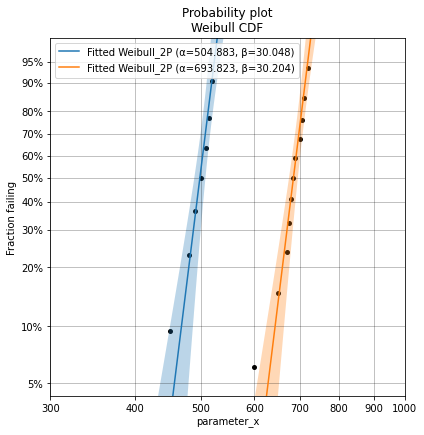

In [12]:
Fit_Weibull_2P(failures = dist_aa, percentiles = True, CI = 0.8)
Fit_Weibull_2P(failures = dist_bb, percentiles = [5,50,95], CI = 0.8)
plt.gcf().set_size_inches(6, 6)
plt.xlabel('parameter_x')
plt.xlim(300.0, 1000.0)